In [1]:
import sys
import os
import pandas as pd
import numpy as np
import pymc

sys.path.append(f'{os.path.dirname(os.path.dirname(os.getcwd()))}/draft_pick_prob')

In [34]:
draft_df=pd.read_csv('/Users/tiffanieli/Downloads/EMSF_CAPSTONE/draft_pick_prob/model_validation/2023_validation/2023_draft_order.csv')


possible_players=pd.read_csv('/Users/tiffanieli/Downloads/EMSF_CAPSTONE/draft_pick_prob/model_validation/2023_validation/2023_PLAYER_IDS.csv')

In [55]:
draft_df=pd.read_csv('/Users/tiffanieli/Downloads/EMSF_CAPSTONE/draft_pick_prob/model_validation/2023_validation/2023_draft_order.csv')

file_list =['2023_2AS_md.csv',"2023_2CP_md.csv","2023_2SW_md.csv","2023_3CP_md.csv",'2023_3SW_md.csv','2023_4CP_md.csv','2023_5CP_md.csv','2023_6CP_md.csv',"2023_7CP_md.csv",'2023_AS_md.csv','2023_BM_md.csv','2023_CP_md.csv','2023_DH_bb.csv',"2023_EP_bb.csv",'2023_FC_bb.csv','2023_MH_bb.csv','2023_MP_bb.csv','2023_PW_md.csv','2023_RS_bb.csv','2023_SS_bb.csv','2023_SW_md.csv']

mock_draft_dfs = []

for filename in file_list:
    df = pd.read_csv(filename)  # Read the CSV file
    
    # Sort the DataFrame by 'RANK' column
    df = df.sort_values(by='RANK')
    
    prefix = filename[5:7]
        
    # Rename the 'RANK' column based on the extracted prefix
    if filename[-6:-4]== 'bb':
        df = df.rename(columns={'RANK': f'bb_RANK_{prefix}_22'})
    else:
        df = df.rename(columns={'RANK': f'md_RANK_{prefix}_22'})
    
    mock_draft_dfs.append(df)  

    
print(mock_draft_dfs[16])



possible_players=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2022_validation/2022PLAYER_IDS.csv')


              PLAYER_NAME  PLAYER_ID  bb_RANK_MP_22
0           Connor Bedard          1              1
1           Adam Fantilli          2              2
2          Matvei Michkov          8              3
3            Leo Carlsson          3              4
4          Zachary Benson         14              5
5              Will Smith          4              6
6         Dalibor Dvorsky          6              7
7            Ryan Leonard          7              8
8           Brayden Yager         19              9
9            Oliver Moore         18             10
10        Dmitri Simashev         13             11
11         Nate Danielson         11             12
12            Eduard Sale         28             13
13           Colby Barlow         16             14
14       Mikhail Gulyayev         34             15
15             Daniil But         17             16
16          Gabe Perrault          9             17
17           Matthew Wood         12             18
18       Dav

In [56]:
import math
df_player_rankings=possible_players[['PLAYER_ID']]

df_player_rankings=df_player_rankings.merge(mock_draft_dfs[0][['PLAYER_ID','md_RANK_2A_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[1][['PLAYER_ID','md_RANK_2C_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[2][['PLAYER_ID','md_RANK_2S_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[3][['PLAYER_ID','md_RANK_3C_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[4][['PLAYER_ID','md_RANK_3S_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[5][['PLAYER_ID','md_RANK_4C_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[6][['PLAYER_ID','md_RANK_5C_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[7][['PLAYER_ID','md_RANK_6C_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[8][['PLAYER_ID','md_RANK_7C_22']], how='left', on=['PLAYER_ID'])

df_player_rankings=df_player_rankings.merge(mock_draft_dfs[9][['PLAYER_ID','md_RANK_AS_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[10][['PLAYER_ID','md_RANK_BM_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[11][['PLAYER_ID','md_RANK_CP_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[12][['PLAYER_ID','bb_RANK_DH_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[13][['PLAYER_ID','bb_RANK_EP_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[14][['PLAYER_ID','bb_RANK_FC_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[15][['PLAYER_ID','bb_RANK_MH_22']], how='left', on=['PLAYER_ID'])

df_player_rankings=df_player_rankings.merge(mock_draft_dfs[16][['PLAYER_ID','bb_RANK_MP_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[17][['PLAYER_ID','md_RANK_PW_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[18][['PLAYER_ID','bb_RANK_RS_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[19][['PLAYER_ID','bb_RANK_SS_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[20][['PLAYER_ID','md_RANK_SW_22']], how='left', on=['PLAYER_ID'])


df_player_rankings

,PLAYER_ID,md_RANK_2A_22,md_RANK_2C_22,md_RANK_2S_22,md_RANK_3C_22,md_RANK_3S_22,md_RANK_4C_22,md_RANK_5C_22,md_RANK_6C_22,md_RANK_7C_22,...,md_RANK_CP_22,bb_RANK_DH_22,bb_RANK_EP_22,bb_RANK_FC_22,bb_RANK_MH_22,bb_RANK_MP_22,md_RANK_PW_22,bb_RANK_RS_22,bb_RANK_SS_22,md_RANK_SW_22
0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2,2.0,2.0,3.0,2.0,2.0,3.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,3,3.0,3.0,4.0,3.0,4.0,2.0,5.0,4.0,4.0,...,3.0,4.0,3.0,4.0,3.0,4.0,4.0,6.0,4.0,4.0
3,4,4.0,4.0,5.0,4.0,3.0,4.0,3.0,3.0,5.0,...,4.0,5.0,7.0,5.0,4.0,6.0,3.0,4.0,6.0,3.0
4,5,6.0,5.0,12.0,5.0,6.0,5.0,6.0,5.0,6.0,...,5.0,16.0,9.0,10.0,16.0,19.0,6.0,11.0,20.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,223,NaN,223.0,NaN,223.0,NaN,NaN,NaN,NaN,128.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,224,NaN,224.0,NaN,224.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224,225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225,226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
def likelihood(strengths, rankings):
    # params: vector of parameters [intercept, slope]
    likelihood=1
    counter=1
    paired_lists = list(zip(strengths, rankings))
    sorted_pairs = sorted(paired_lists, key=lambda x: x[1])
    sorted_list1, sorted_list2 = zip(*sorted_pairs)
    while counter<len(sorted_list2)+1 and sorted_list2[counter]!=sorted_list2[counter+1]:
        # print(np.exp(sorted_list1[counter-1]))
        # print(np.sum(np.exp(sorted_list1[counter-1:])))
        # print(np.exp(sorted_list1[counter-1])/np.sum(np.exp(sorted_list1[counter-1:])))
        likelihood+=np.log(np.exp(sorted_list1[counter-1])/np.sum(np.exp(sorted_list1[counter-1:])))
        counter+=1
    return likelihood

def neg_log_likelihood(params, df):
    neg_ll = 1  # Initialize as 0 for correct accumulation
    columns_to_go_through = df.columns[1:]
    for i in columns_to_go_through:
        max_rank = df[i].max() + 1
        player_rank = list(df[i])
        fixed_player_rank = [max_rank if math.isnan(x) else x for x in player_rank]
        
        # Determine the weighting factor based on column name
        if i.startswith('bb'):
            weight = 0.5  # Example: 0.5 for less value
        elif i.startswith('md'):
            weight = 1.0  # Example: 1.0 (or more) for 'md' columns
        else:
            weight = 1.0  # Default weight for other columns

        # Apply the weighting factor
        neg_ll -= weight * likelihood(params, fixed_player_rank)

    return neg_ll

In [58]:
def constraint_eq(x):
    return sum(x)

In [59]:
import scipy.optimize

counter=40
l_play=[]
variable_bounds=[]
count=0

while count<len(df_player_rankings):
    l_play.append(counter)
    count+=1
    counter-=0.20
    variable_bounds.append((-40,40))

result = scipy.optimize.minimize(neg_log_likelihood, l_play, args=(df_player_rankings,), method='SLSQP', bounds=variable_bounds, constraints={'type': 'eq', 'fun': constraint_eq})
print(result.x)

[ 39.66739749  20.39356279  17.51863462  17.19757998  14.32911678
  14.46010122  14.32399508  15.62329939  12.97994175  11.72175074
  12.92479683  12.55463518  11.66570599  13.4107297   11.73753096
  12.13749409  10.94532199  12.59208638  11.93043438  12.34989337
   9.24448124   9.71813154  10.96746415  10.57874352   8.60844735
   8.40363967   9.43979349  10.79531284   9.35832058   9.68618656
   9.27286493   8.24831706   7.6761338    9.5351116    9.66532474
   8.99224801   8.17370921   7.46604744   8.0190758    6.79788386
   7.03526567   8.32950894   6.64425915   7.79539623   8.2030128
   8.57443882   6.65835099   6.72912387   8.13371959   6.90623191
   6.14621838   6.530224     6.33377429   6.16019076   5.92502647
   6.40724476   5.53016715   6.5748126    7.08573799   3.13725586
   4.89436868   6.54481926   5.70929727   5.05010299   4.18714753
   6.90888688   5.72174381   5.42498775   5.20788      4.0823322
   4.6886845    5.3998455    3.83020982   5.69659459   5.80655467
   4.6268761

In [64]:

player_ability_parameters_df=pd.read_csv('/Users/tiffanieli/Downloads/EMSF_CAPSTONE/draft_pick_prob/model_validation/2023_validation/2023_PLAYER_IDS.csv')
player_ability_parameters_df = player_ability_parameters_df.head(227)

player_ability_parameters_df['ABILITY_PARAMS']=result.x
player_ability_parameters_df=player_ability_parameters_df.sort_values(by='ABILITY_PARAMS', ascending=False, axis=0)
player_ability_parameters_df['SIM_RANK'] = range(1, len(player_ability_parameters_df) + 1)
player_ability_parameters_df.head(10)

,PLAYER_NAME,PLAYER_ID,ABILITY_PARAMS,SIM_RANK
0,Connor Bedard,1,39.667397,1
1,Adam Fantilli,2,20.393563,2
2,Leo Carlsson,3,17.518635,3
3,William Smith,4,17.197580,4
7,Matvei Michkov,8,15.623299,5
5,Dalibor Dvorsky,6,14.460101,6
4,David Reinbacher,5,14.329117,7
6,Ryan Leonard,7,14.323995,8
13,Zach Benson,14,13.410730,9
8,Gabriel Perreault,9,12.979942,10


In [65]:
merged_df

,PLAYER_NAME,PLAYER_ID,ORDER
0,Connor Bedard,1,1
2,Leo Carlsson,3,2
1,Adam Fantilli,2,3
3,William Smith,4,4
4,David Reinbacher,5,5
12,Dmitri Simashev,13,6
7,Matvei Michkov,8,7
6,Ryan Leonard,7,8
10,Nate Danielson,11,9
5,Dalibor Dvorsky,6,10


In [66]:
#Error -Mean absolute error (MAE)
merged_df = player_ability_parameters_df.merge(draft_df[['PLAYER_NAME', 'ORDER']], on='PLAYER_NAME')
merged_df = merged_df.sort_values(by='ORDER')
merged_df = merged_df.head(32)
merged_df['ERROR'] = abs(merged_df['SIM_RANK']-merged_df['ORDER'])
mae = merged_df['ERROR'].sum()/len(merged_df['ERROR'])
print(mae)


5.28125


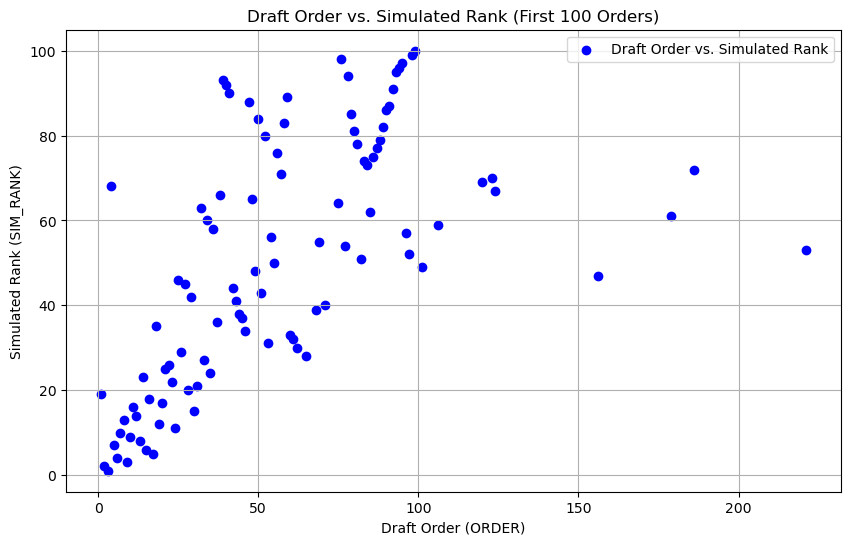

In [11]:
import matplotlib.pyplot as plt

# Assuming you have DataFrames: draft_df and player_ability_parameters_df

# Merge the two DataFrames on the 'PLAYER_NAME' column
merged_df = player_ability_parameters_df.merge(draft_df[['PLAYER_NAME', 'ORDER']], on='PLAYER_NAME')

# Filter the data for the first 100 orders
merged_df_first_100 = merged_df.head(100)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df_first_100['ORDER'], merged_df_first_100['SIM_RANK'], c='blue', label='Draft Order vs. Simulated Rank')
plt.xlabel('Draft Order (ORDER)')
plt.ylabel('Simulated Rank (SIM_RANK)')
plt.title('Draft Order vs. Simulated Rank (First 100 Orders)')
plt.grid(True)
plt.legend()

plt.show()
